In [1]:
import pandas as pd
import normalize
import outliers
import summary

In [18]:
train_data = pd.read_csv('../../data/input/ames_test.csv')

In [6]:
summary.missing_data(train_data).head(25)
train_data = normalize.fill_in_missing_values(train_data)

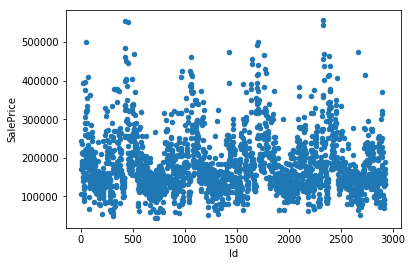

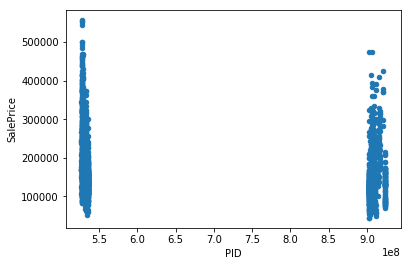

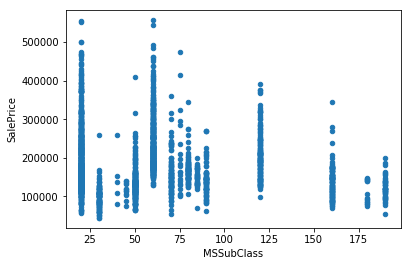

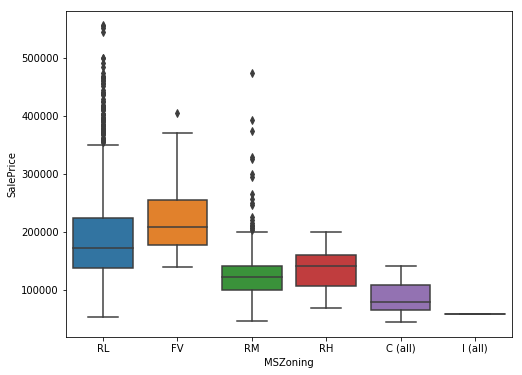

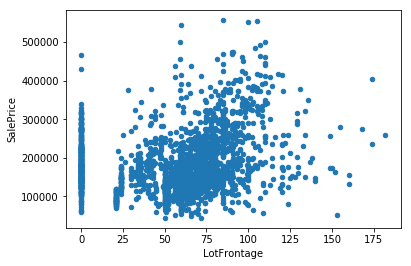

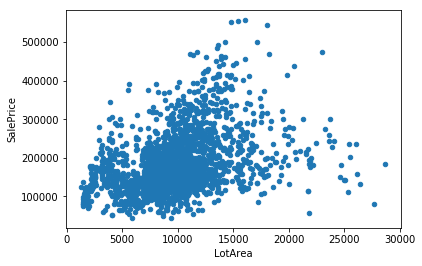

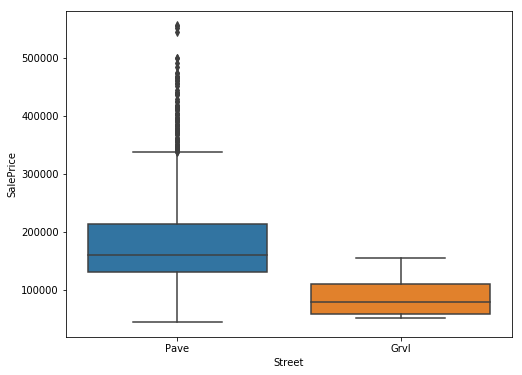

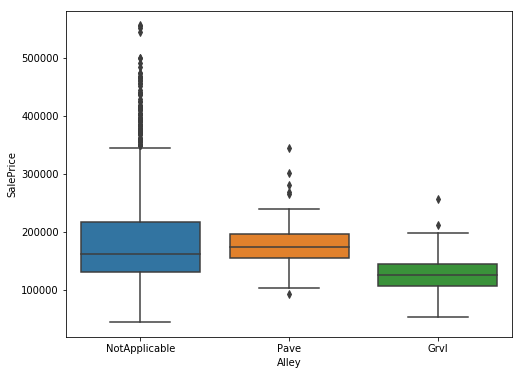

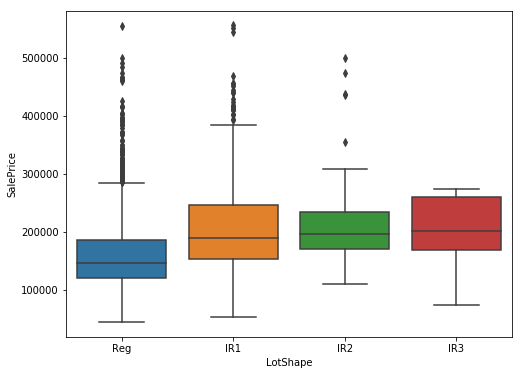

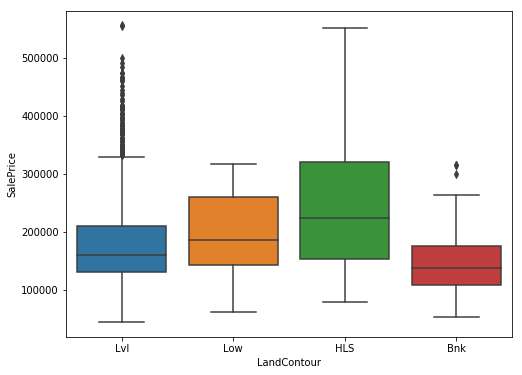

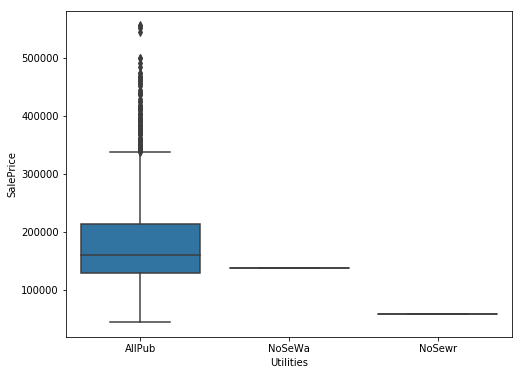

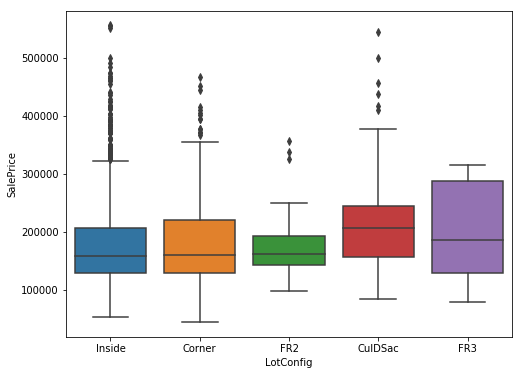

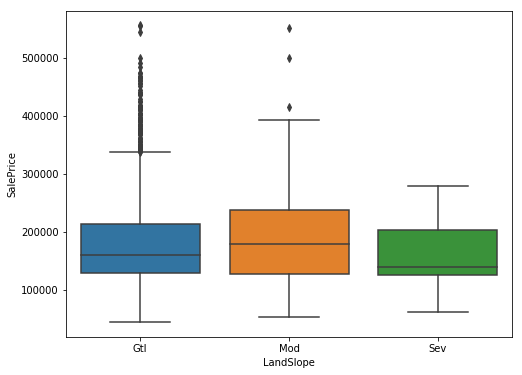

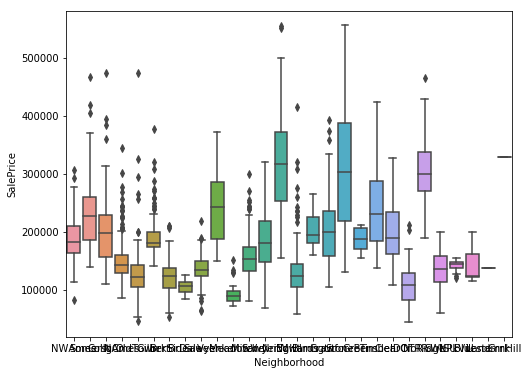

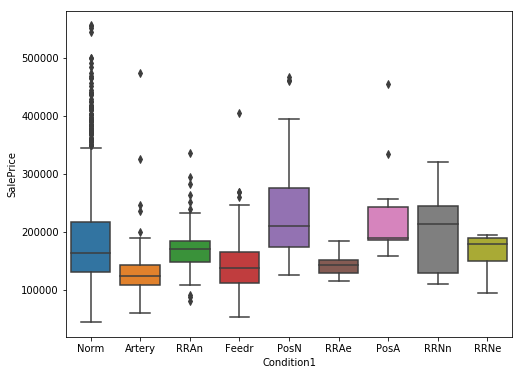

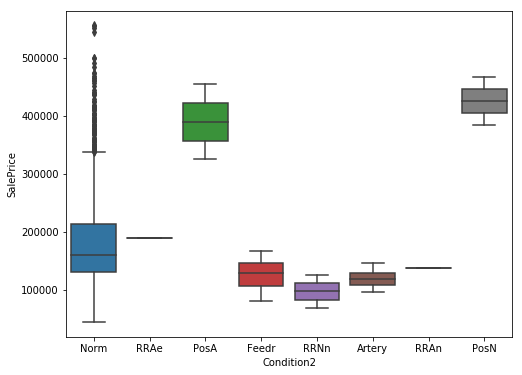

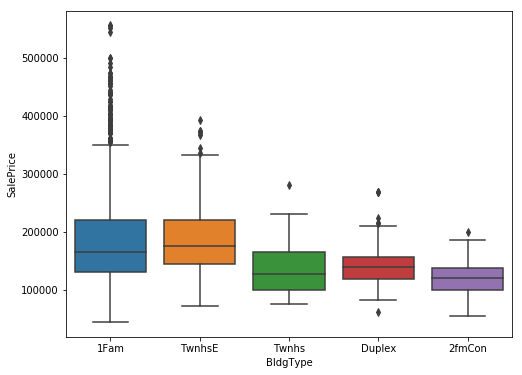

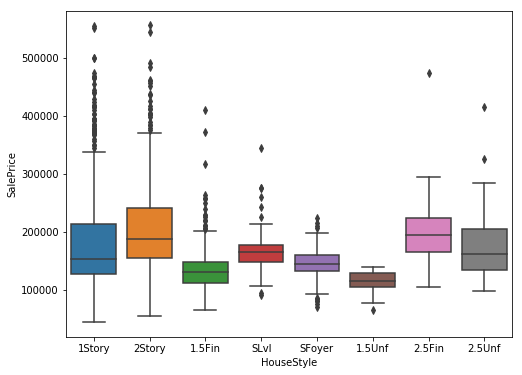

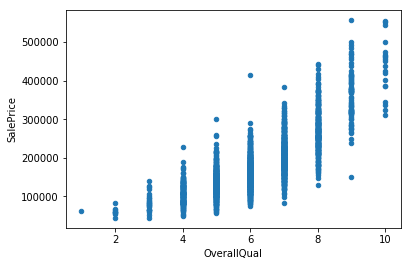

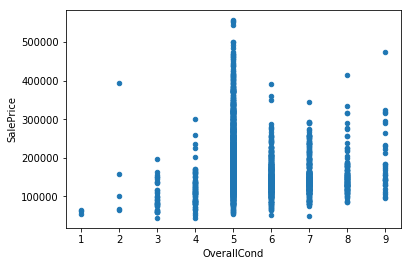

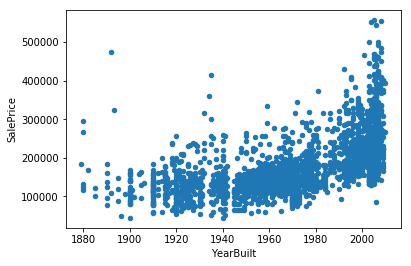

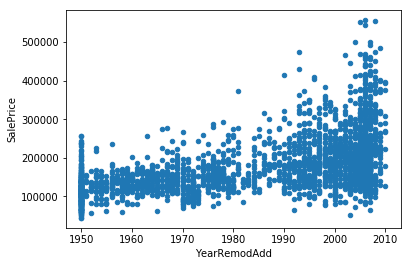

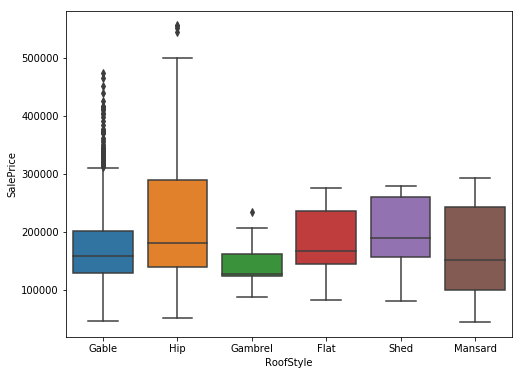

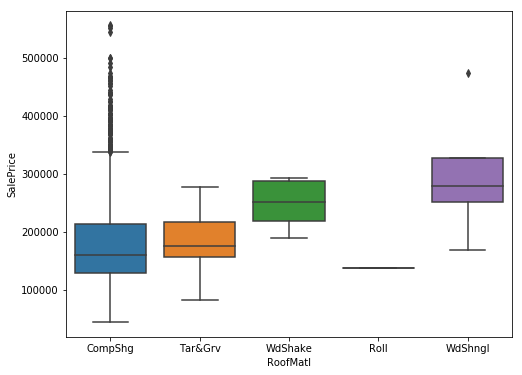

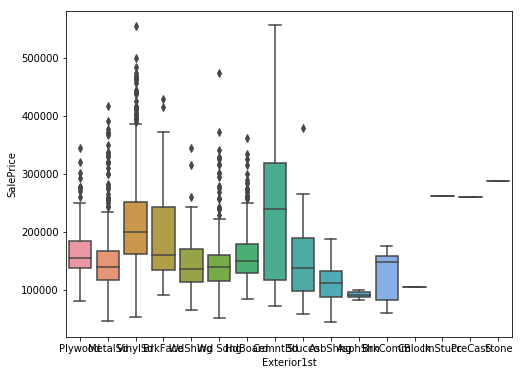

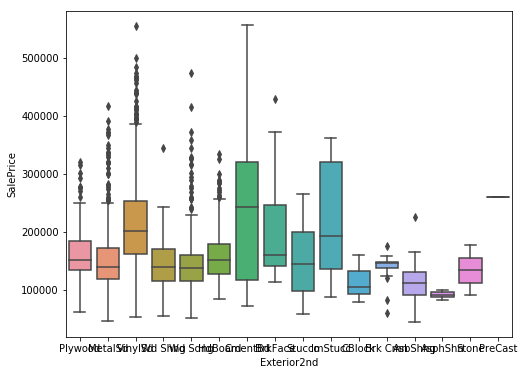

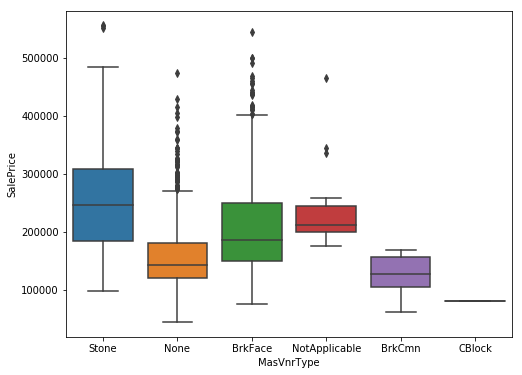

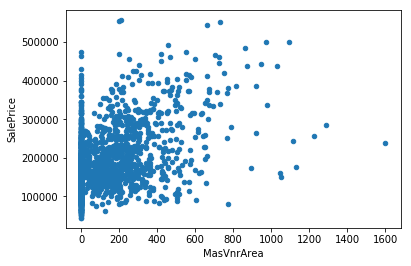

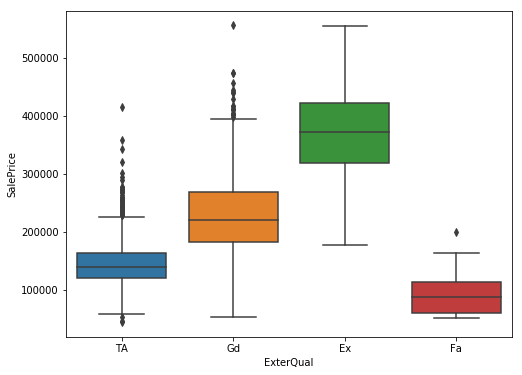

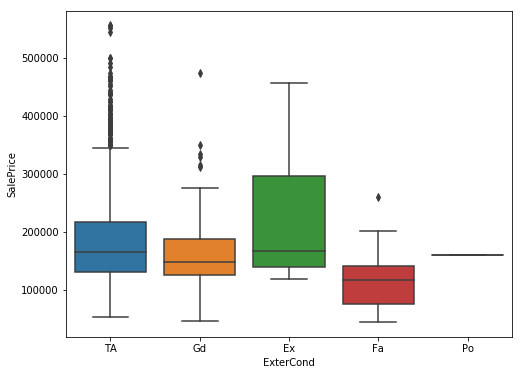

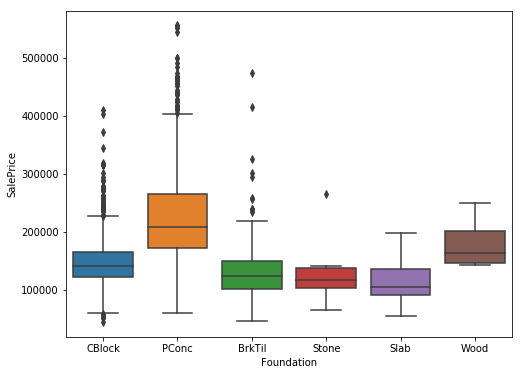

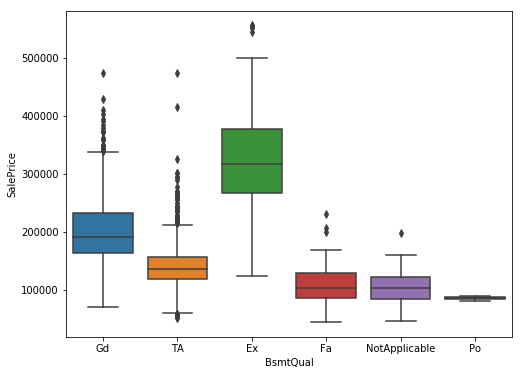

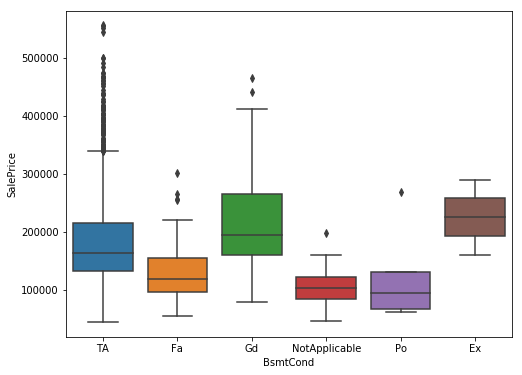

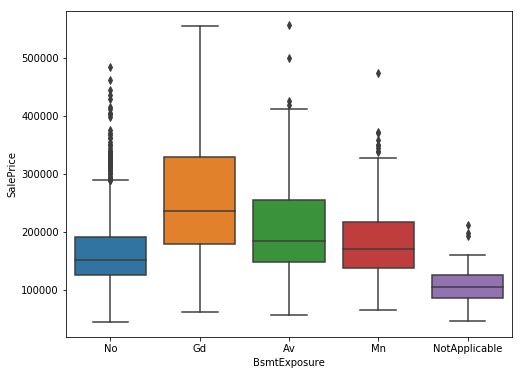

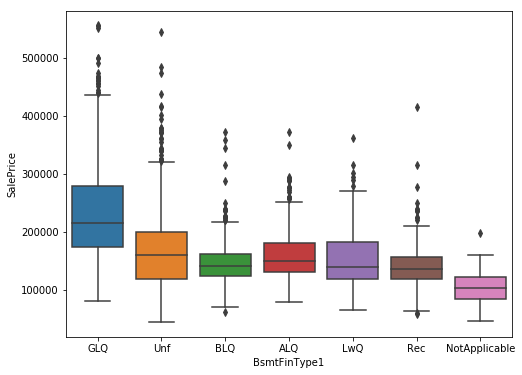

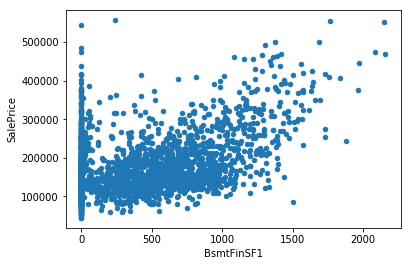

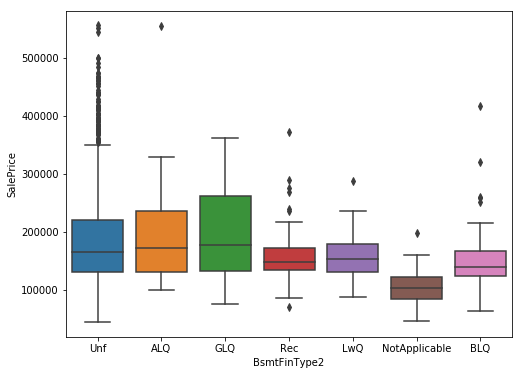

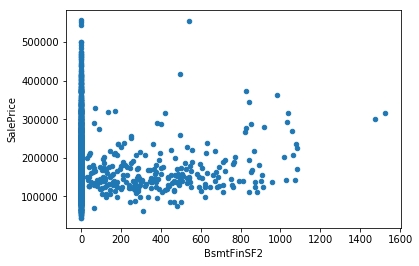

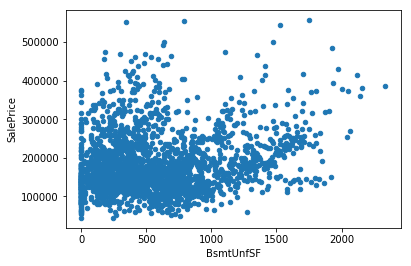

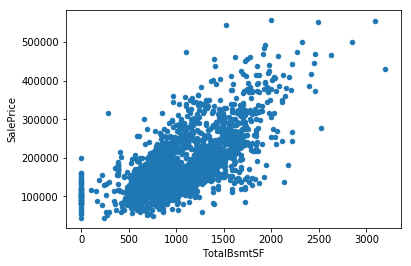

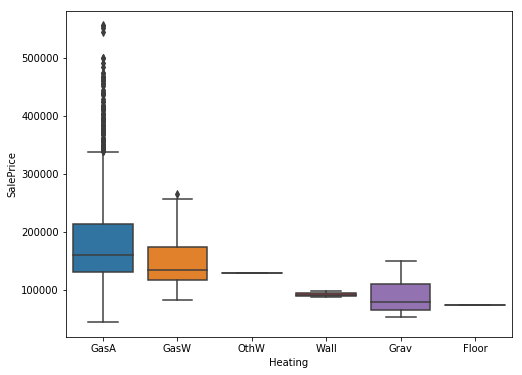

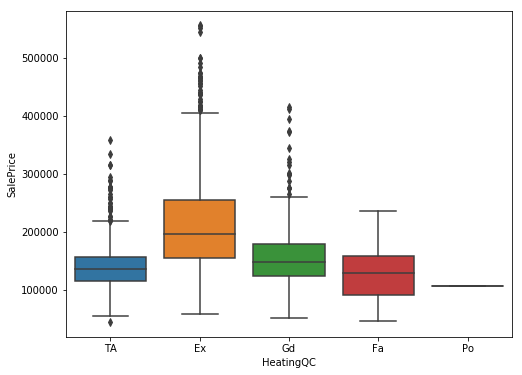

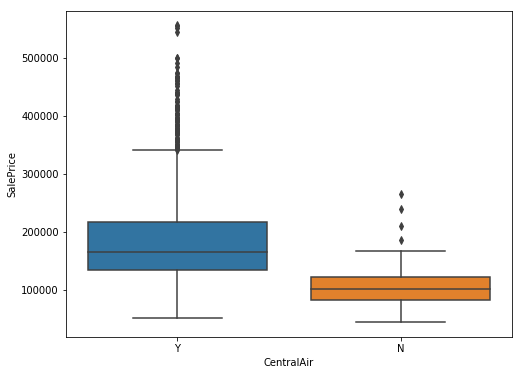

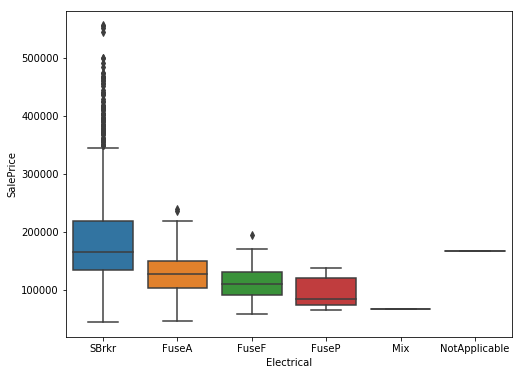

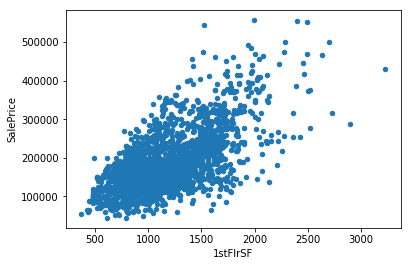

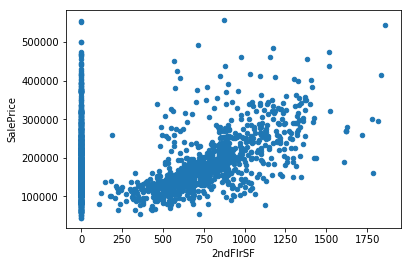

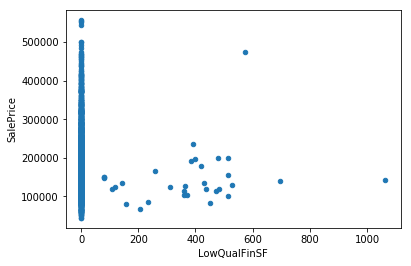

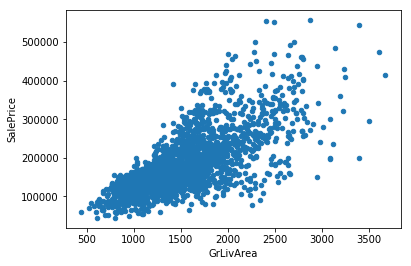

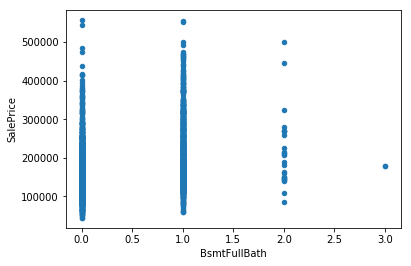

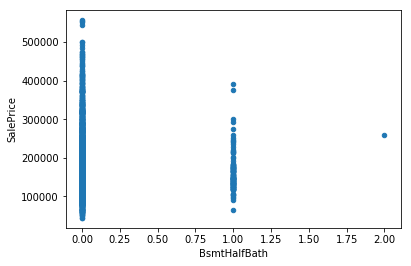

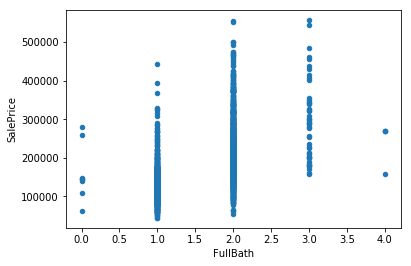

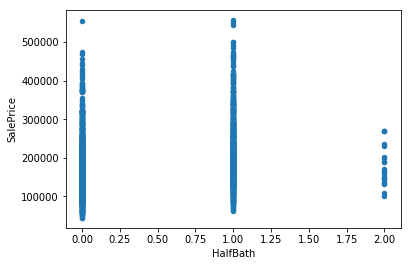

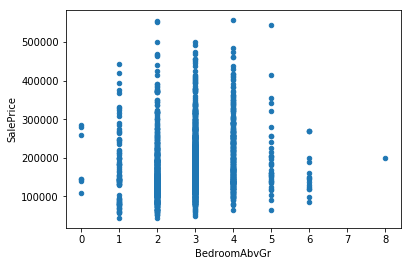

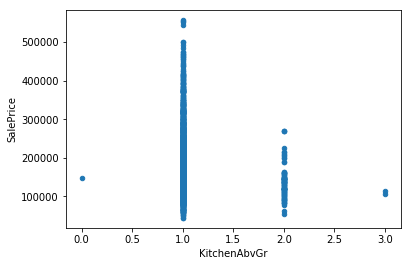

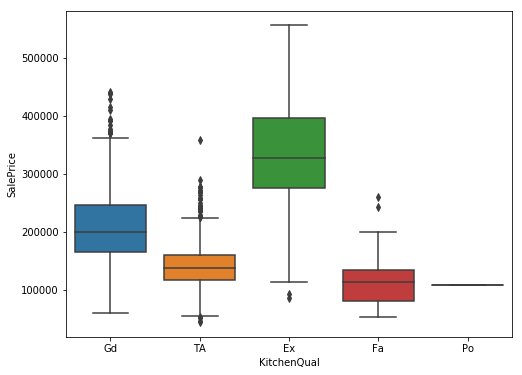

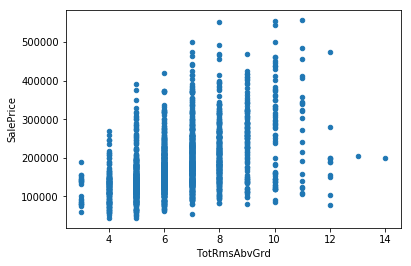

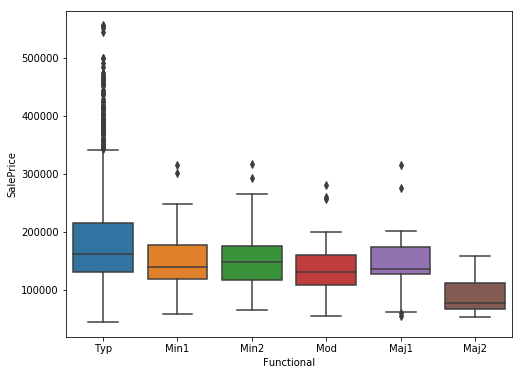

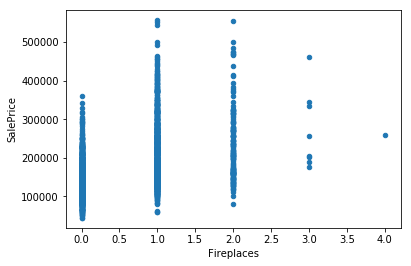

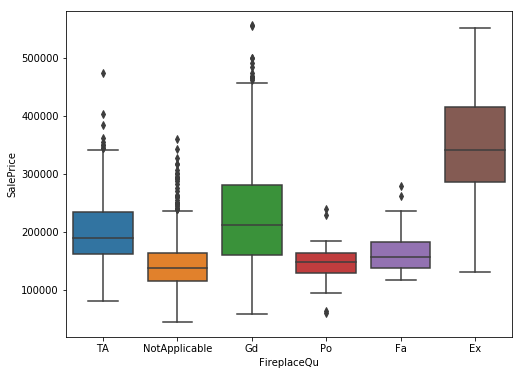

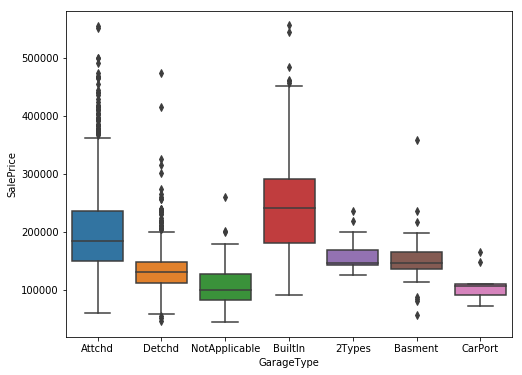

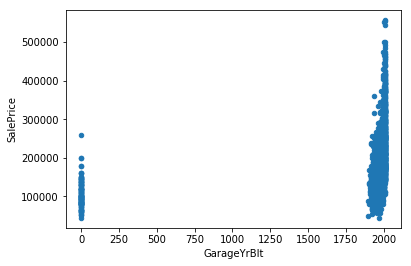

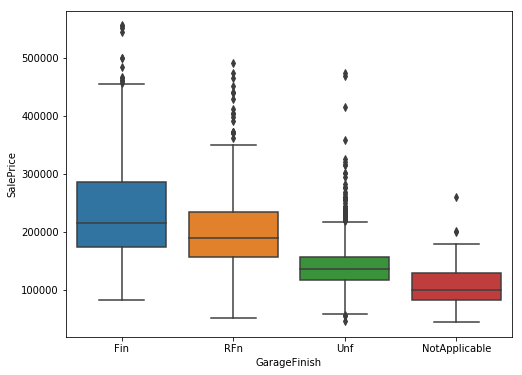

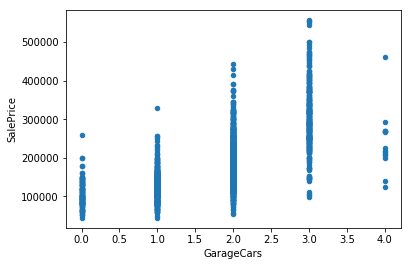

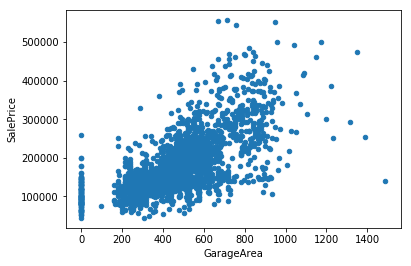

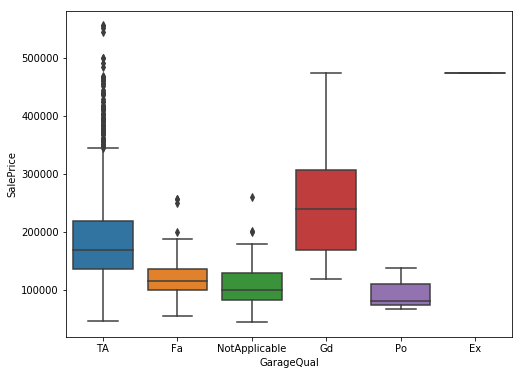

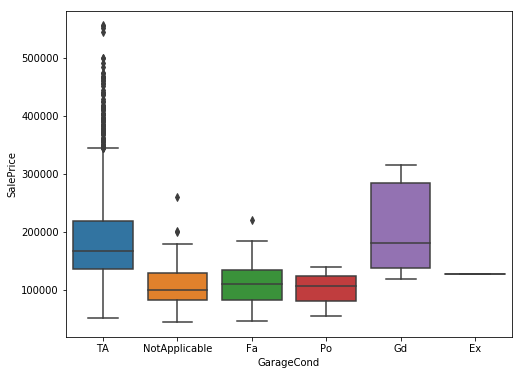

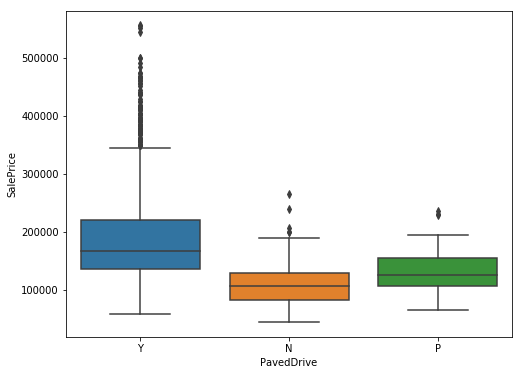

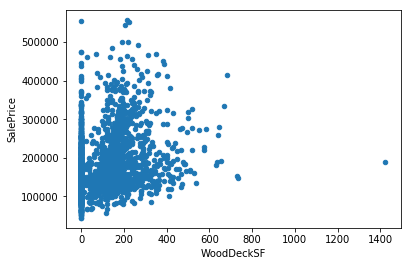

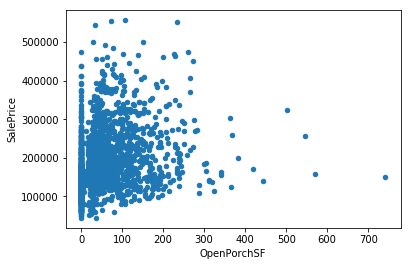

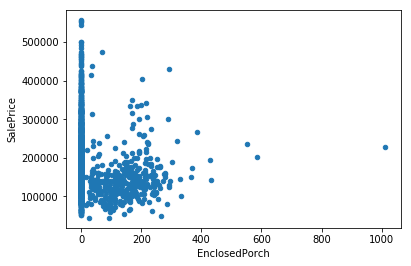

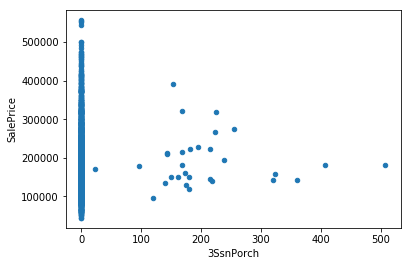

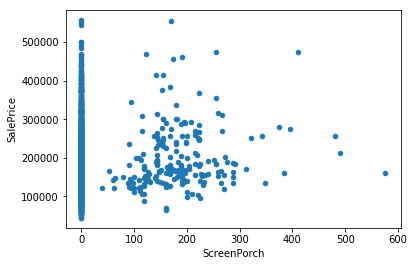

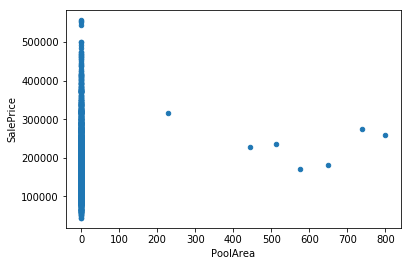

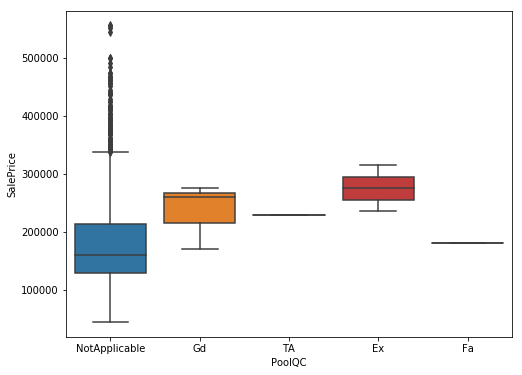

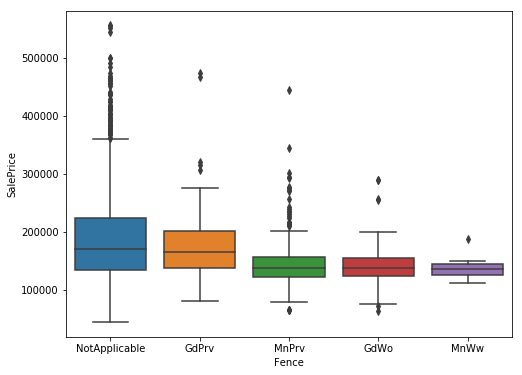

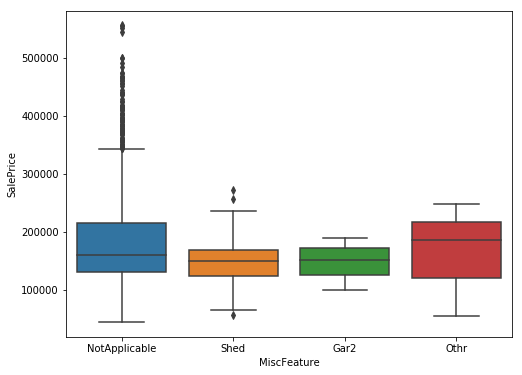

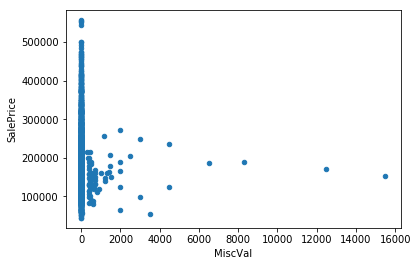

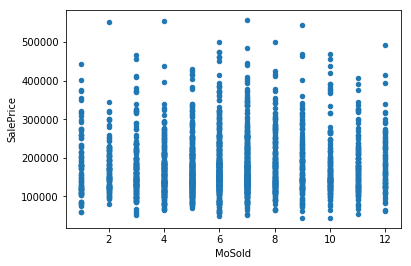

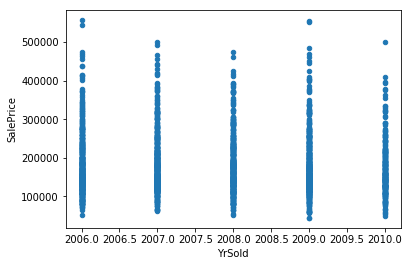

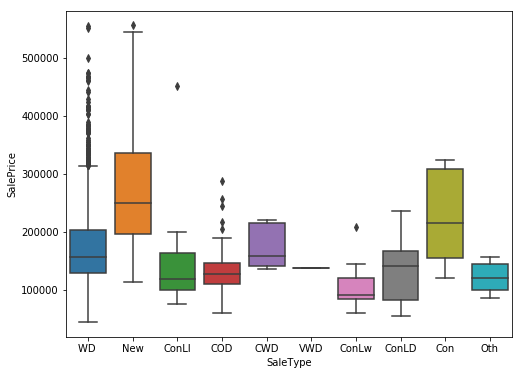

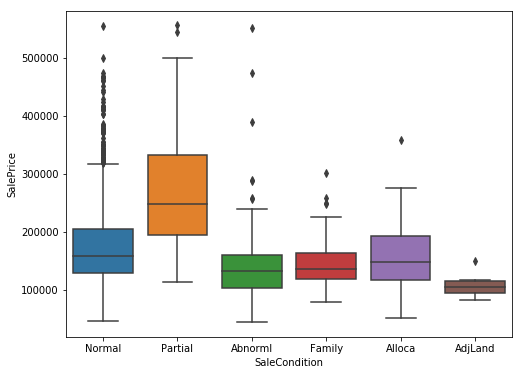

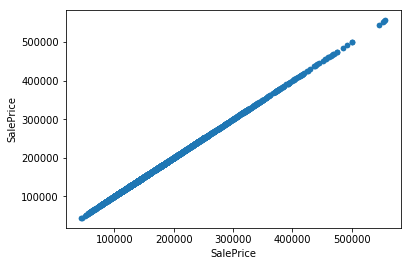

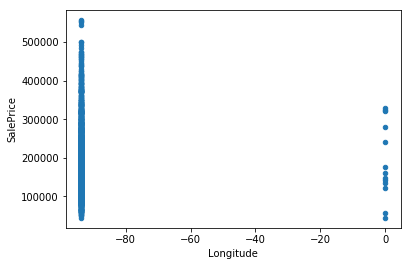

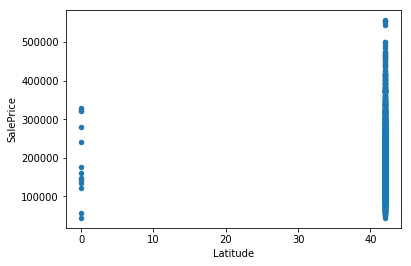

In [8]:
#fill in and see all
train_data = normalize.fill_in_missing_values(train_data)
cols = list(train_data.columns)
for col, dtype in summary.columns_and_types(train_data):
    if(dtype == 'object'):
        summary.box_whisker_plot(train_data, col, 'SalePrice')
    else:
        summary.scatter_plot(train_data, col, 'SalePrice')

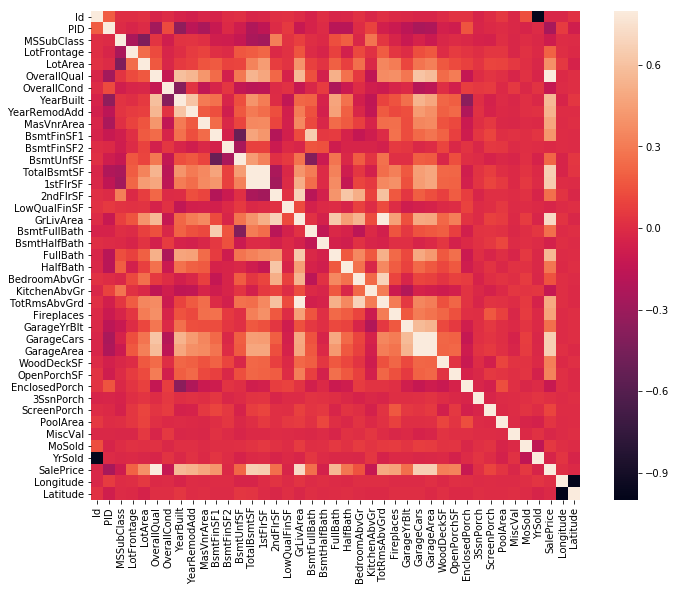

In [9]:
summary.all_correlations(train_data)

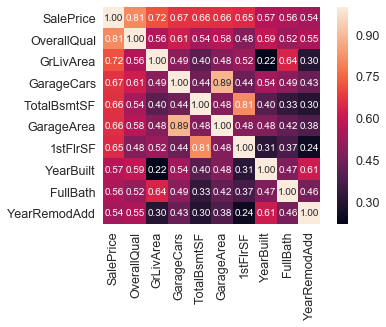

In [7]:
summary.top_k_correlations(train_data, 10)

In [8]:
train_data = normalize.remove_correlated_features(train_data)

In [ ]:
summary.all_correlations(train_data)

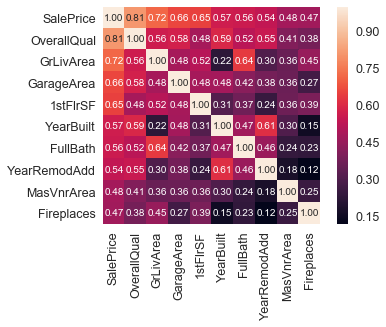

In [9]:
summary.top_k_correlations(train_data, 10)

In [ ]:
summary.pair_plot(train_data)

586


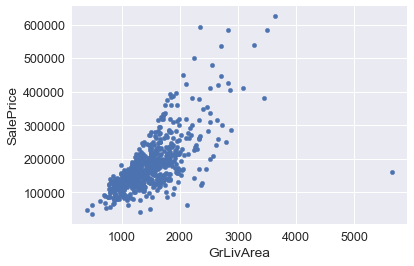

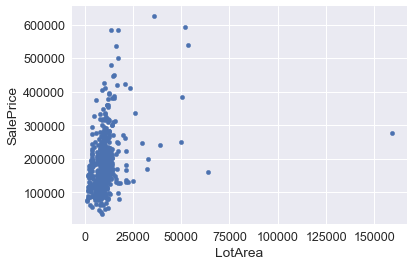

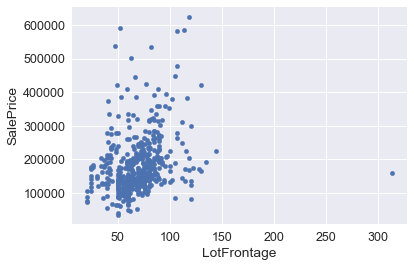

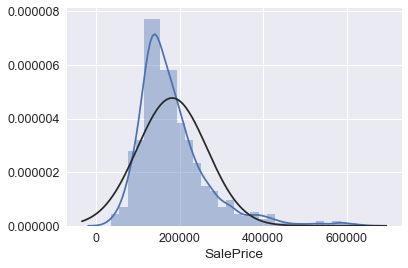

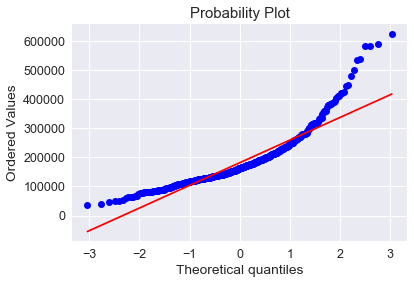

In [11]:
print(len(train_data))
summary.scatter_plot(train_data, 'GrLivArea', 'SalePrice')
summary.scatter_plot(train_data, 'LotArea', 'SalePrice')
summary.scatter_plot(train_data, 'LotFrontage', 'SalePrice')
summary.histogram(train_data, 'SalePrice')

574


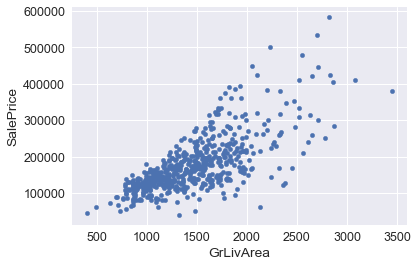

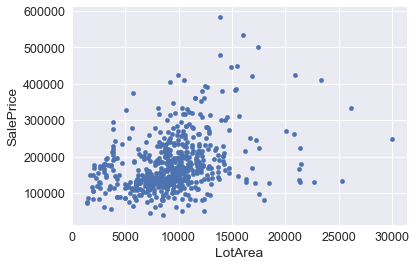

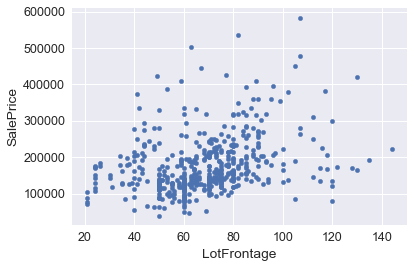

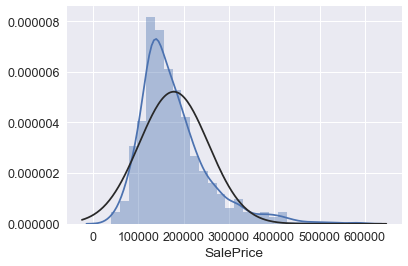

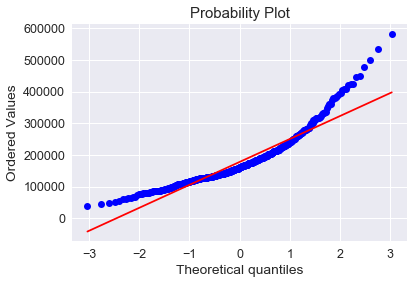

In [12]:
#Get rid of outliers and try again
train_data = outliers.remove_outliers(train_data)
print(len(train_data))
summary.scatter_plot(train_data, 'GrLivArea', 'SalePrice')
summary.scatter_plot(train_data, 'LotArea', 'SalePrice')
summary.scatter_plot(train_data, 'LotFrontage', 'SalePrice')
summary.histogram(train_data, 'SalePrice')

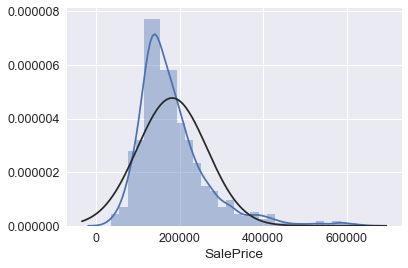

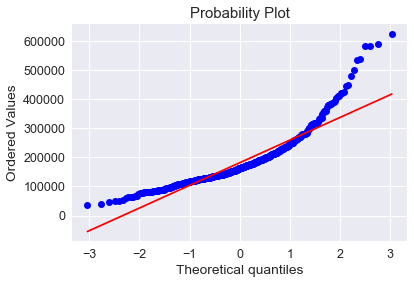

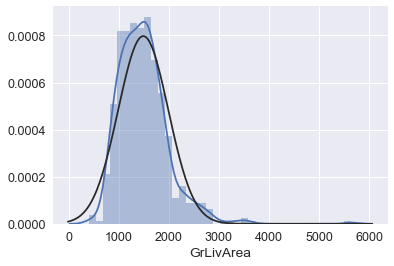

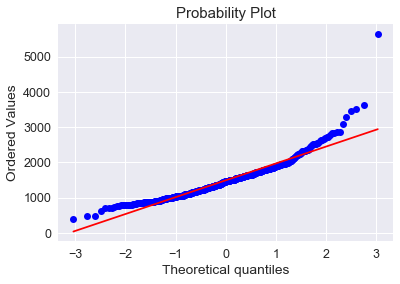

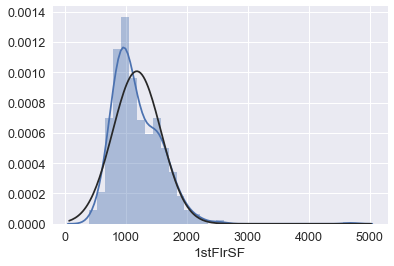

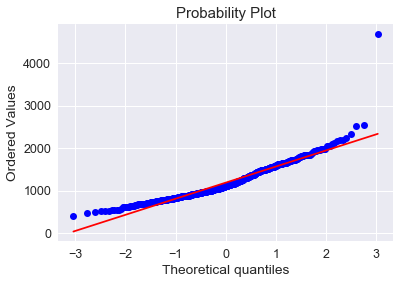

count       586.000000
mean     181536.595563
std       83736.218681
min       35311.000000
25%      129000.000000
50%      162700.000000
75%      212999.750000
max      625000.000000
Name: SalePrice, dtype: float64
Skew:
1.86501156318
Kurtosis:
5.23347593593
End of sales summary statistics==========================




In [19]:
#now examine normality
summary.histogram(train_data, 'SalePrice')
summary.histogram(train_data, 'GrLivArea')
summary.histogram(train_data, '1stFlrSF')
summary.describe(train_data, 'SalePrice')

In [20]:
train_data = normalize.take_logs(train_data)

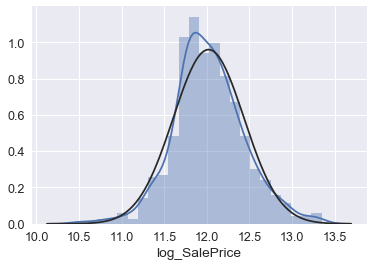

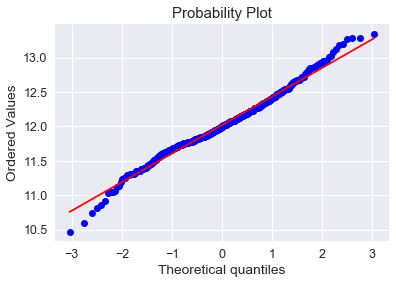

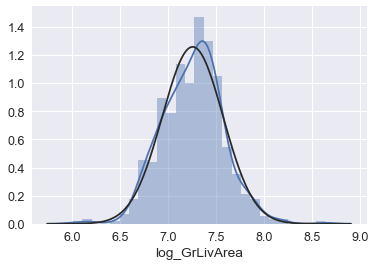

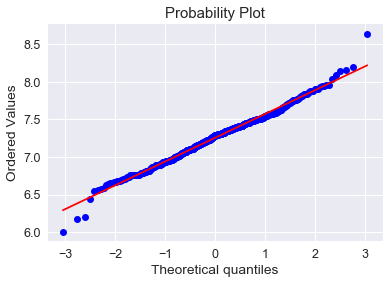

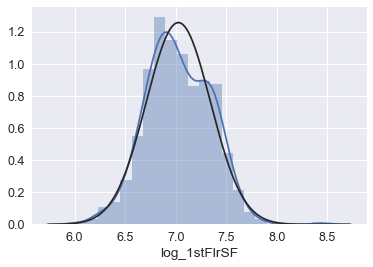

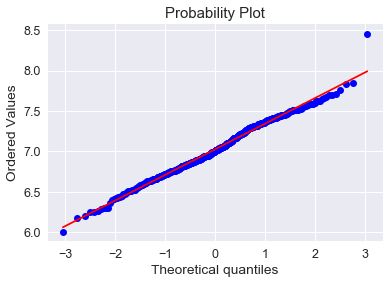

count    586.000000
mean      12.020239
std        0.416297
min       10.471950
25%       11.767568
50%       11.999663
75%       12.269046
max       13.345507
Name: log_SalePrice, dtype: float64
Skew:
0.126717426554
Kurtosis:
0.896527564463
End of sales summary statistics==========================




In [21]:
#reexamine normality
summary.histogram(train_data, 'log_SalePrice')
summary.histogram(train_data, 'log_GrLivArea')
summary.histogram(train_data, 'log_1stFlrSF')
summary.describe(train_data, 'log_SalePrice')

In [ ]:
corrmat = train_data.corr()
sale_corrs = corrmat['log_SalePrice']
sale_corrs = sale_corrs.sort_values(ascending = False)
#ignore the first one because it is a comparison of sales price to sales price with a correlation of 1
sale_corrs = sale_corrs[1:11]
for elt in sale_corrs.iteritems():
    summary.scatter_plot(train_data, elt[0], 'log_SalePrice')

In [22]:
train_data.head(5)

,Id,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,log_SalePrice,Longitude,Latitude
0,2250,914452190,20,RL,71.0,9187,Pave,NaN,Reg,Bnk,...,NaN,NaN,0,6,2007,WD,Normal,11.805595,-93.607597,41.994206
1,2664,902329070,70,RM,60.0,3600,Pave,Grvl,Reg,Lvl,...,NaN,NaN,0,10,2006,WD,Normal,11.648365,-93.612796,42.028115
2,2034,903454010,70,RM,60.0,6882,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,3,2007,WD,Normal,11.751942,-93.627757,42.024998
3,2820,908103310,90,RL,38.0,7840,Pave,NaN,IR1,Lvl,...,NaN,NaN,0,10,2006,WD,AdjLand,11.755872,-93.675297,42.020592
4,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,NaN,NaN,0,6,2010,WD,Normal,12.183316,-93.638925,42.060779


In [23]:
train_data = pd.get_dummies(train_data)

In [24]:
train_data.head(5)

,Id,PID,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2250,914452190,20,71.0,9187,6,5,1983,1983,0.0,...,0,0,0,1,0,0,0,0,1,0
1,2664,902329070,70,60.0,3600,6,7,1910,1993,0.0,...,0,0,0,1,0,0,0,0,1,0
2,2034,903454010,70,60.0,6882,6,7,1914,2006,0.0,...,0,0,0,1,0,0,0,0,1,0
3,2820,908103310,90,38.0,7840,6,5,1975,1975,355.0,...,0,0,0,1,0,1,0,0,0,0
4,6,527105030,60,78.0,9978,6,6,1998,1998,20.0,...,0,0,0,1,0,0,0,0,1,0
